# 🏡 Airbnb Price Prediction in Athens

**Author**: Ashvinaah Ragunathan
**Tools**: Python · Jupyter Notebooks · Scikit-learn · XGBoost · Folium · Matplotlib · Seaborn

---

## 🧠 Project Overview

This project explores a real-world Airbnb dataset to predict listing prices using machine learning. The goal is to demonstrate core data science skills — from data cleaning and exploratory analysis to feature engineering, modeling, and visualization — while extracting business-relevant insights.

---

## 📊 Dataset

- **Source**: [Inside Airbnb](https://insideairbnb.com/get-the-data.html)
- **Description**: Public Airbnb data for a specific city. Includes:
  - Price
  - Room type
  - Neighbourhood
  - Availability
  - Reviews
  - Geographic coordinates (latitude/longitude)

---

## 🔍 Key Steps

### 1. Data Cleaning
- Handled missing values and anomalies
- Converted price to numeric format
- Removed outliers

### 2. Exploratory Data Analysis (EDA)
- Distribution of prices across neighborhoods
- Correlation matrix to identify predictive features
- Created an interactive map with **Folium**

### 3. Feature Engineering
- Selected top features based on correlation and domain logic
- Normalized data for SVM and KNN models

### 4. Modeling

Built and compared **6 regression models**:
- Linear Regression
- Ridge Regression
- KNN Regressor
- SVR (Support Vector Regression)
- Random Forest
- XGBoost

**Evaluation metrics**:
- **RMSE** (Root Mean Squared Error)
- **R² Score** (Explained Variance)

### 5. Results Visualization
- 📊 Bar plot comparing RMSE and R² for all models
- 📈 Scatter plot: Predicted vs Actual prices
- 🗺️ Interactive Folium map of Airbnb listings

---

## 🥇 Best Model

| Model           | R² Score | RMSE     |
|----------------|----------|----------|
| Random Forest  | 0.22     | \$73.85  |

> 💡 *This shows how real-world price prediction is challenging, due to variability in location, amenities, and other factors.*

---

## 📌 Key Takeaways

- Real-world data is noisy and requires preprocessing.
- Visuals like correlation heatmaps and maps help build intuition.
- Machine learning models perform differently depending on data scale and structure.
- SVM and KNN benefit from feature scaling.
- Business insight and communication are just as critical as modeling.

---

## 🧰 Tech Stack

- `pandas`, `numpy` — data wrangling
- `matplotlib`, `seaborn` — visualization
- `folium` — interactive mapping
- `scikit-learn`, `xgboost` — modeling
- `jupyterlab` — notebook interface

---



# 1. Data Exploration


### a) Load the dataset

In [1]:
import pandas as pd

# Load data
df = pd.read_csv('/Users/ashvinaahragunathan/Downloads/airbnb-analysis/data/listings.csv')

### b) Preview the data

In [2]:
# See the first 5 rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27262,"AQA-No7, Great mattress, high speed internet",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,NaN,1,29,2024-11-18,0.19,1,0,4,00002433111
1,33945,Spacious Cosy aprtm very close to Metro!,146553,Katerina,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.00673,23.72775,Entire home/apt,35.0,4,83,2025-06-18,0.47,2,315,13,00000874421
2,7457792,Athens Kolonaki Stay!,6761879,Patrick,NaN,ΚΟΛΩΝΑΚΙ,37.97825,23.75044,Entire home/apt,52.0,3,34,2025-05-12,0.29,1,266,5,00000112611
3,7506567,Plaka Penthouse with view to Acropolis,15423131,Cristi,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97483,23.73201,Entire home/apt,129.0,3,97,2025-06-07,0.99,1,364,7,00000236660
4,7559058,Awarded Loft in the Center of Athens,14184069,Manos,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.98390,23.71874,Entire home/apt,NaN,1,578,2025-06-10,4.80,8,293,45,00003163949


### c) Check the shape (rows & columns)

In [3]:
df.shape


(15632, 18)

### d) Get column names and data types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15632 entries, 0 to 15631
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15632 non-null  int64  
 1   name                            15632 non-null  object 
 2   host_id                         15632 non-null  int64  
 3   host_name                       15112 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15632 non-null  object 
 6   latitude                        15632 non-null  float64
 7   longitude                       15632 non-null  float64
 8   room_type                       15632 non-null  object 
 9   price                           14851 non-null  float64
 10  minimum_nights                  15632 non-null  int64  
 11  number_of_reviews               15632 non-null  int64  
 12  last_review                     

### e) Check for missing values

In [5]:
df.isnull().sum().sort_values(ascending=False)


neighbourhood_group               15632
last_review                        2509
reviews_per_month                  2509
price                               781
host_name                           520
license                             203
latitude                              0
longitude                             0
room_type                             0
name                                  0
minimum_nights                        0
number_of_reviews                     0
neighbourhood                         0
host_id                               0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
id                                    0
dtype: int64

### f) Basic descriptive stats (to spot weird values)

In [6]:
df.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.563200e+04,1.563200e+04,0.0,15632.000000,15632.000000,14851.000000,15632.000000,15632.000000,13123.000000,15632.000000,15632.000000,15632.000000
mean,7.381334e+17,2.774046e+08,NaN,37.979763,23.731546,131.182547,2.652380,52.950678,1.699604,17.476714,243.358367,13.007677
std,5.458343e+17,2.151012e+08,NaN,0.013101,0.012309,534.282612,10.397829,95.125572,1.720865,29.709934,106.362396,18.826009
min,2.726200e+04,3.717700e+04,NaN,37.949625,23.700809,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.551375e+07,7.745789e+07,NaN,37.968907,23.724100,54.000000,1.000000,2.000000,0.400000,1.000000,171.000000,0.000000
50%,9.166805e+17,2.215346e+08,NaN,37.978470,23.729780,76.000000,2.000000,13.000000,1.080000,5.000000,271.000000,4.000000
75%,1.207905e+18,4.864266e+08,NaN,37.987250,23.737092,116.000000,2.000000,58.000000,2.490000,18.000000,334.000000,18.000000
max,1.449435e+18,7.022443e+08,NaN,38.030830,23.780220,38000.000000,444.000000,1002.000000,16.980000,168.000000,365.000000,204.000000


# 2. Clean the Data

### a) Focus on Relevant column

In [7]:
columns_to_keep = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood',
    'latitude', 'longitude', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'availability_365'
]

df = df[columns_to_keep]
df.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,27262,"AQA-No7, Great mattress, high speed internet",37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,NaN,1,29,0.19,0
1,33945,Spacious Cosy aprtm very close to Metro!,146553,Katerina,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.00673,23.72775,Entire home/apt,35.0,4,83,0.47,315
2,7457792,Athens Kolonaki Stay!,6761879,Patrick,ΚΟΛΩΝΑΚΙ,37.97825,23.75044,Entire home/apt,52.0,3,34,0.29,266
3,7506567,Plaka Penthouse with view to Acropolis,15423131,Cristi,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97483,23.73201,Entire home/apt,129.0,3,97,0.99,364
4,7559058,Awarded Loft in the Center of Athens,14184069,Manos,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.98390,23.71874,Entire home/apt,NaN,1,578,4.80,293


### b) Clean the "price" column

In [8]:
# Check data type
print(df['price'].dtype)

# If it's a string with symbols:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


float64


In [9]:
# Remove listings with price = 0 or > 1000 (adjust threshold as needed)
df = df[(df['price'] > 0) & (df['price'] < 1000)]


### c) Handle missing values

In [10]:
# Check again
df.isnull().sum()

# Drop rows with missing reviews_per_month
df = df.dropna(subset=['reviews_per_month'])


In [11]:
# Fill NA values with 0 if that makes more sense contextually
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


### e) Final check

In [39]:
# Check data types again
df.info()

# Confirm cleaning
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 12531 entries, 1 to 15597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12531 non-null  int64  
 1   name               12531 non-null  object 
 2   host_id            12531 non-null  int64  
 3   host_name          12133 non-null  object 
 4   neighbourhood      12531 non-null  object 
 5   latitude           12531 non-null  float64
 6   longitude          12531 non-null  float64
 7   room_type          12531 non-null  object 
 8   price              12531 non-null  float64
 9   minimum_nights     12531 non-null  int64  
 10  number_of_reviews  12531 non-null  int64  
 11  reviews_per_month  12531 non-null  float64
 12  availability_365   12531 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.3+ MB


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,1.253100e+04,1.253100e+04,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000
mean,6.725350e+17,2.584150e+08,37.979497,23.731446,97.830660,2.488149,64.163993,1.737473,249.200303
std,5.410072e+17,2.085606e+08,0.013190,0.012541,86.120945,9.912076,101.658972,1.735184,99.735113
min,3.394500e+04,1.093630e+05,37.951089,23.700809,9.000000,1.000000,1.000000,0.010000,0.000000
25%,4.085572e+07,6.755438e+07,37.968375,23.723750,53.000000,1.000000,6.000000,0.420000,176.000000
50%,8.534876e+17,1.981735e+08,37.978120,23.729561,73.000000,2.000000,22.000000,1.130000,277.000000
75%,1.160777e+18,4.619388e+08,37.987261,23.737251,108.000000,2.000000,75.000000,2.560000,333.000000
max,1.446274e+18,7.006672e+08,38.030830,23.780220,971.000000,444.000000,1002.000000,16.980000,365.000000


# 3. Exploratory Data Analysis

### a) Create correlation matrix

In [12]:
# If price is a string with symbols:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


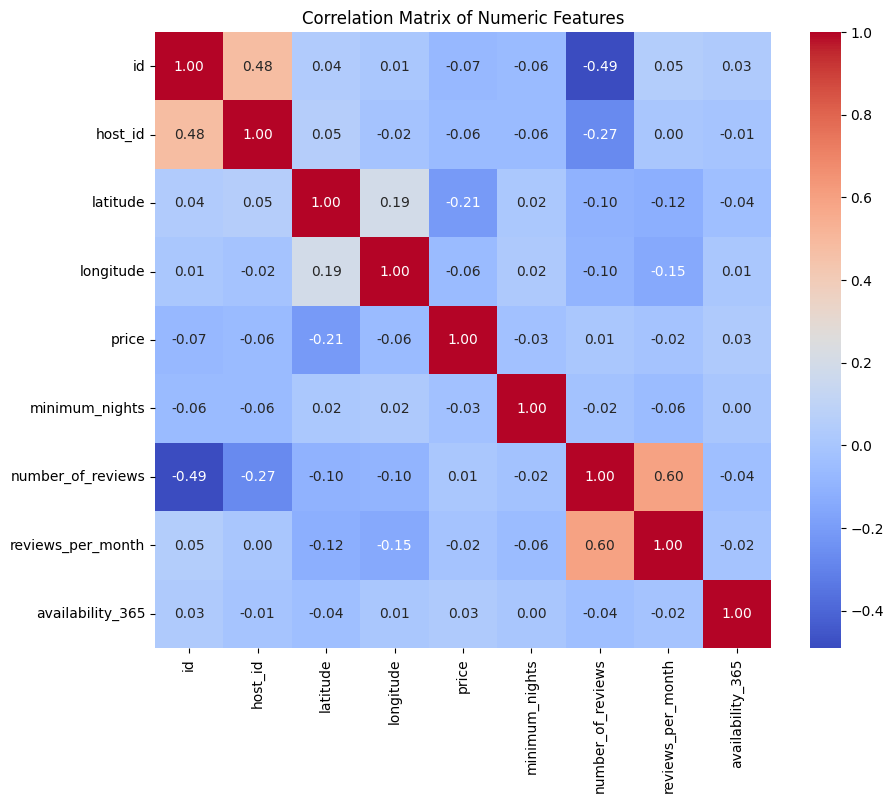

In [38]:
# Compute correlation
corr_matrix = numeric_df.corr(numeric_only=True)

# Display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### b) Understand Price Distribution

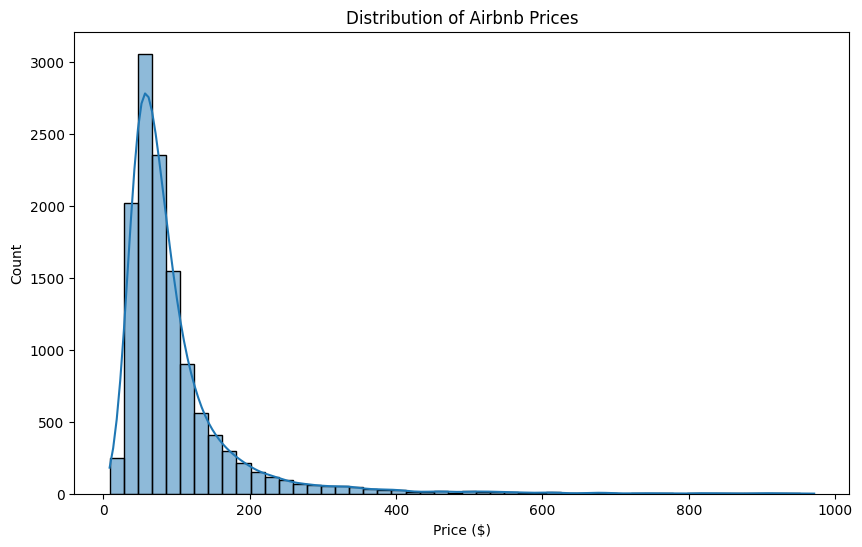

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


### c) Trim outliers for cleaner plots

In [41]:
# Trim prices above 500 for better visual clarity (don’t delete from main df yet)
df_viz = df[df['price'] < 500]


### d) Price vs Room Type

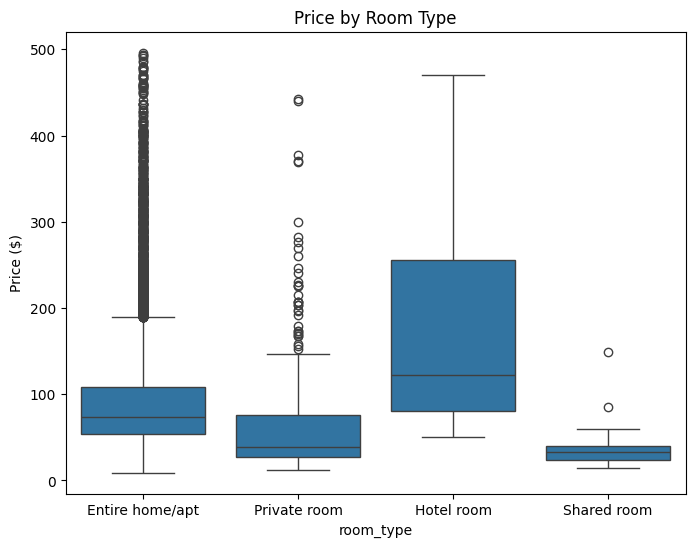

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df_viz)
plt.title('Price by Room Type')
plt.ylabel('Price ($)')
plt.show()


### e) Price vs Number of Reviews

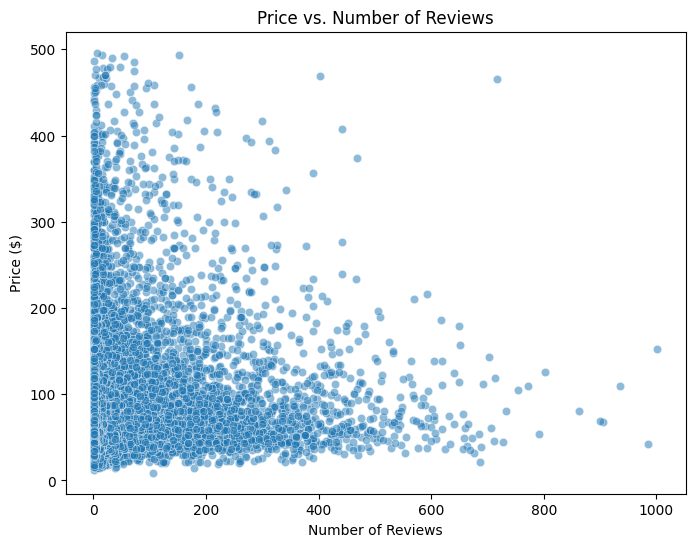

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df_viz, alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()


### f) Price by Neighbourhood (The Top 10)

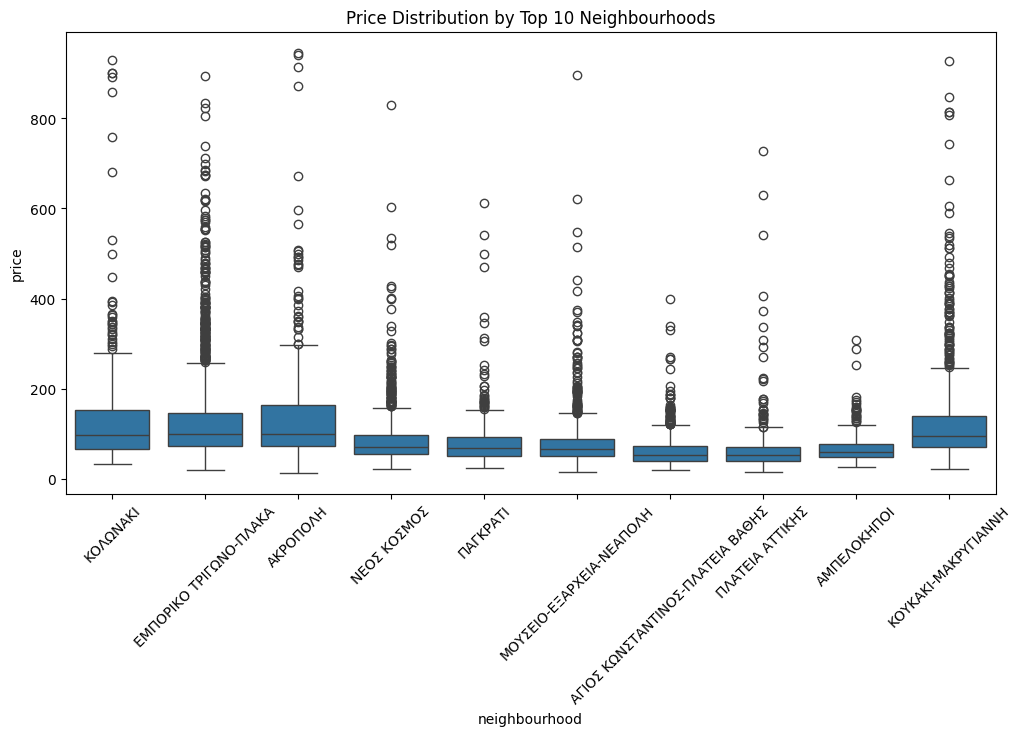

In [44]:
# Get top 10 most common neighbourhoods
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(10).index
df_top = df[df['neighbourhood'].isin(top_neighborhoods)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=df_top)
plt.title('Price Distribution by Top 10 Neighbourhoods')
plt.xticks(rotation=45)
plt.show()


### g) Geographic view

In [45]:
import folium

map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

for _, row in df.sample(1000).iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        popup=f"${row['price']}"
    ).add_to(m)

# Save to file
m.save("airbnb_map.html")


# 4. Modeling

### a) Prepare the data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Encode categorical
X = pd.get_dummies(df[[
    'room_type',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'availability_365',
    'latitude',
    'longitude'
]], drop_first=True)

y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### b) Train and Evaluate Models

In [47]:
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf', C=100),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


results = {}

for name, model in models.items():
    if name in ["KNN Regressor", "SVR"]:  # Needs scaled data
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results[name] = {'RMSE': round(rmse, 2), 'R2 Score': round(r2, 2)}


### c) Compare model performance

In [48]:
results_df = pd.DataFrame(results).T.sort_values('RMSE')
results_df.style.background_gradient(cmap="YlGnBu").set_caption("Model Comparison: RMSE and R²")


,RMSE,R2 Score
Random Forest,73.850000,0.220000
XGBoost,74.030000,0.220000
SVR,79.840000,0.090000
Linear Regression,81.270000,0.060000
Ridge Regression,81.420000,0.050000
KNN Regressor,81.560000,0.050000


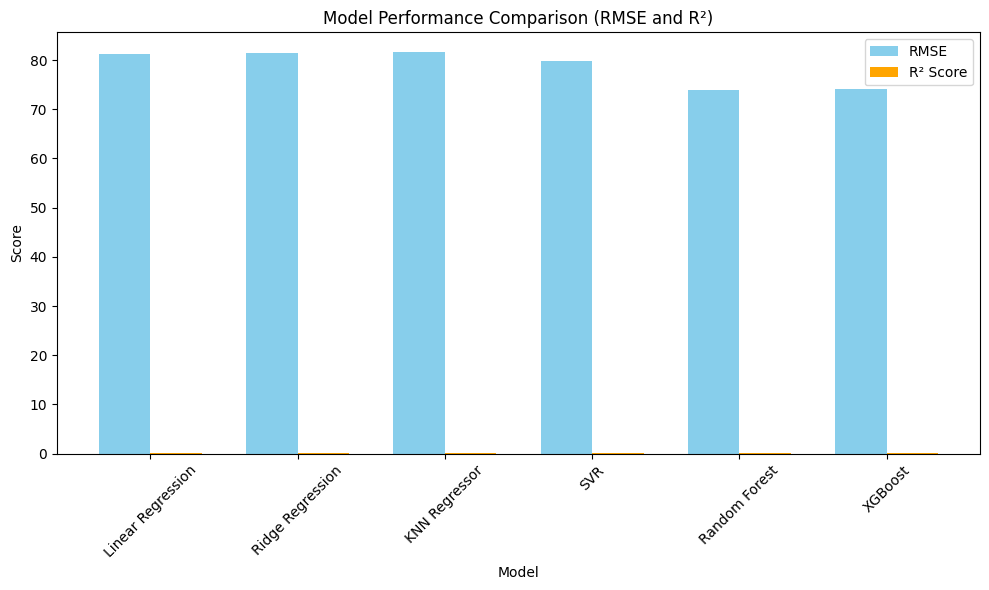

In [49]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
rmse_values = [results[model]['RMSE'] for model in model_names]
r2_values = [results[model]['R2 Score'] for model in model_names]

x = range(len(model_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(x, rmse_values, width=bar_width, label='RMSE', color='skyblue')
plt.bar([i + bar_width for i in x], r2_values, width=bar_width, label='R² Score', color='orange')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison (RMSE and R²)')
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### d) Predicted vs Actual Plot

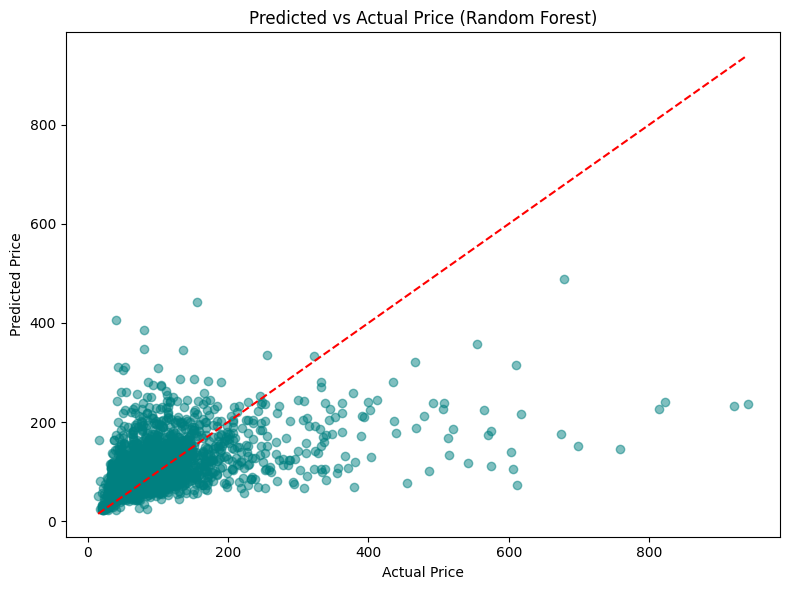

In [50]:
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
best_model = models[best_model_name]

best_preds = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_preds, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Predicted vs Actual Price ({best_model_name})")
plt.tight_layout()
plt.show()


### e) Residuals histogram

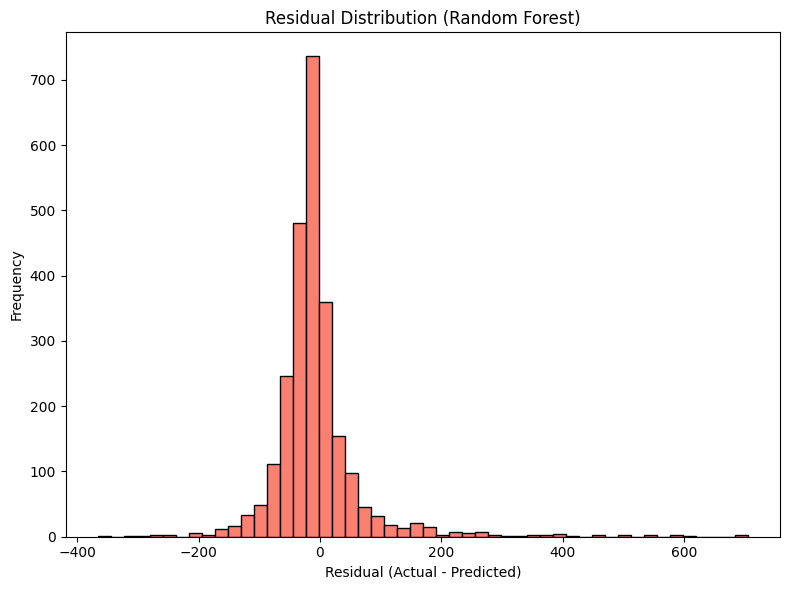

In [51]:
residuals = y_test - best_preds

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color='salmon', edgecolor='black')
plt.title(f"Residual Distribution ({best_model_name})")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
